In [1]:
import numpy as np
import pandas as pd
import math
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

In [3]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [4]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,agea,239,97.218990
1,sclact,94,98.906214
2,pplfair,39,99.546195
3,happy,31,99.639283
4,pplhlp,25,99.709099
5,partner,17,99.802188
6,sclmeet,15,99.825460
7,ppltrst,14,99.837096
8,gndr,10,99.883640
9,tvtot,8,99.906912


#### It's safe to drop all nan values

In [5]:
df = df.dropna()

In [6]:
print(df.shape)

(8147, 13)


#### Separate the dataframe into two based on the years, and get the mean on the outcome of our interest

In [7]:
df12 = df[df['year'] == 6]
df14 = df[df['year'] == 7]
print('Year 2012\n',df12.groupby(['cntry'])['ppltrst'].mean())
print('Year 2014\n',df14.groupby(['cntry'])['ppltrst'].mean())

Year 2012
 cntry
CH    5.685792
CZ    4.402662
DE    5.076923
ES    5.127807
NO    6.648305
SE    6.043073
Name: ppltrst, dtype: float64
Year 2014
 cntry
CH    5.764468
CZ    4.356436
DE    5.357143
ES    4.940035
NO    6.599719
SE    6.239908
Name: ppltrst, dtype: float64


#### Plot the data to see the distribution

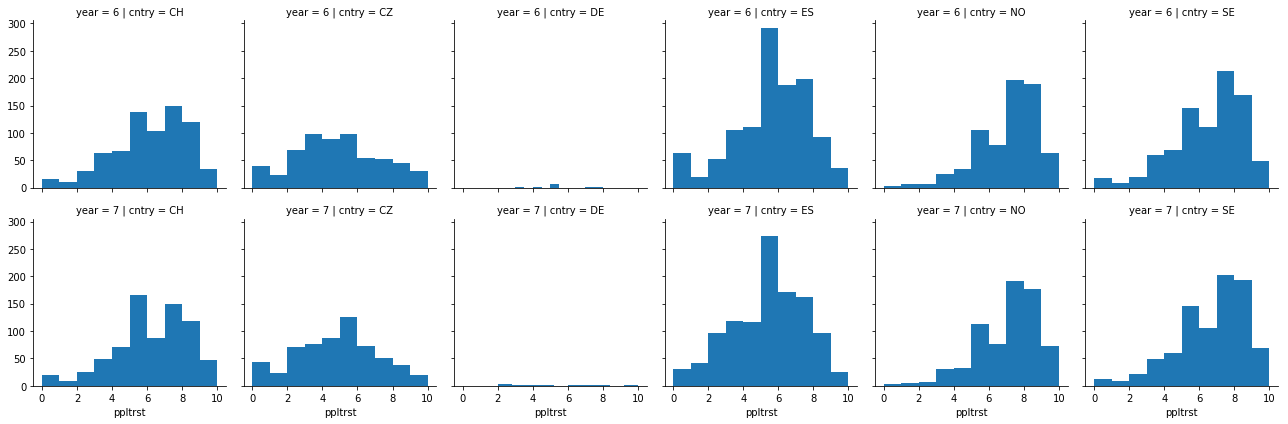

In [8]:
g = sns.FacetGrid(df, col="cntry",  row="year")
g = g.map(plt.hist, "ppltrst")

#### It's pretty similar between each year so I think maybe a QQ plot will do the job

In [9]:
#Generate normal distributed data with the same length
norm = np.random.normal(0, 1, 8147)
norm = sorted(norm)
trust = sorted(list(df['ppltrst']))

In [10]:
# Add them to the dataframe for plotting
df['norm'] = norm
df['ppltrst2'] = trust

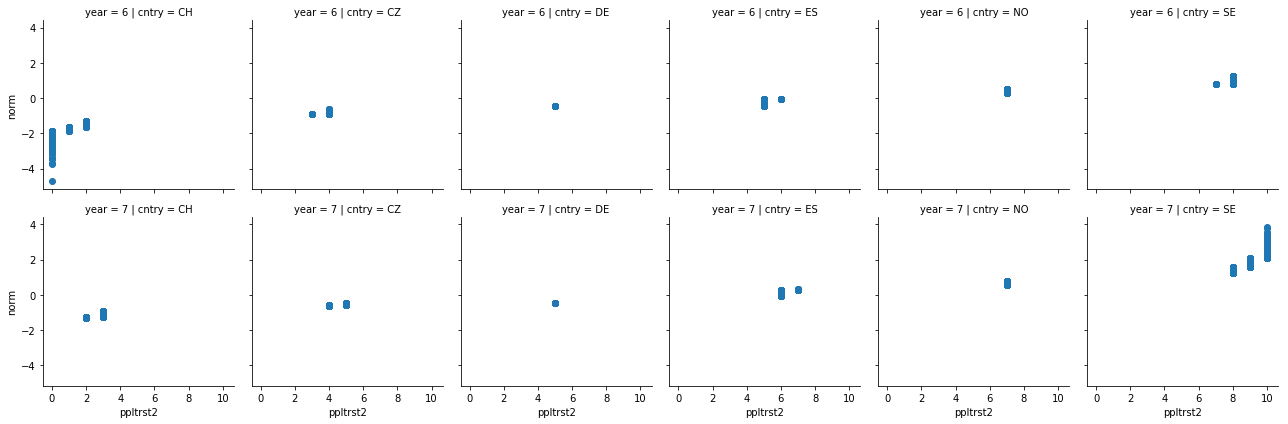

In [11]:
g = sns.FacetGrid(df, col="cntry",  row="year")
g = g.map(plt.scatter, 'ppltrst2','norm')

#### Since our interest of outcome is more like categorical data, so the QQ plot doesn't achieve what we want

In [12]:
df['cntry'].unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [13]:
# So let's run the Non-parametric test on each set of data.
stats.kruskal(
    df12[df12['cntry'] == 'CZ']['ppltrst'],
    df12[df12['cntry'] == 'CH']['ppltrst'],
    df12[df12['cntry'] == 'DE']['ppltrst'],
    df12[df12['cntry'] == 'ES']['ppltrst'],
    df12[df12['cntry'] == 'NO']['ppltrst'],
    df12[df12['cntry'] == 'SE']['ppltrst'])

KruskalResult(statistic=437.53206188915857, pvalue=2.4011978577142313e-92)

In [14]:
stats.kruskal(
    df14[df14['cntry'] == 'CZ']['ppltrst'],
    df14[df14['cntry'] == 'CH']['ppltrst'],
    df14[df14['cntry'] == 'DE']['ppltrst'],
    df14[df14['cntry'] == 'ES']['ppltrst'],
    df14[df14['cntry'] == 'NO']['ppltrst'],
    df14[df14['cntry'] == 'SE']['ppltrst'])

KruskalResult(statistic=528.6431154445382, pvalue=5.2315568811114275e-112)

### 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [15]:
trstmean12 = pd.DataFrame(df12.groupby(['cntry'])['ppltrst'].mean())
trstmean14 = pd.DataFrame(df14.groupby(['cntry'])['ppltrst'].mean())

In [16]:
trstmean12['ppltrst14'] = trstmean14['ppltrst']
trstmean12['meanDiff'] = trstmean12['ppltrst14'] - trstmean12['ppltrst']
trstmean12

,ppltrst,ppltrst14,meanDiff
cntry,,,
CH,5.685792,5.764468,0.078676
CZ,4.402662,4.356436,-0.046227
DE,5.076923,5.357143,0.280220
ES,5.127807,4.940035,-0.187771
NO,6.648305,6.599719,-0.048586
SE,6.043073,6.239908,0.196834


### 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [17]:
happymean12 = pd.DataFrame(df12.groupby(['cntry'])['happy'].mean())
happymean14 = pd.DataFrame(df14.groupby(['cntry'])['happy'].mean())
happymean12['happy14'] = happymean14['happy']
happymean12['meanDiff'] = happymean12['happy14'] - happymean12['happy']
happymean12

,happy,happy14,meanDiff
cntry,,,
CH,8.083333,8.142665,0.059332
CZ,6.790349,6.922442,0.132093
DE,7.307692,7.857143,0.549451
ES,7.557858,7.450617,-0.107241
NO,8.252825,7.919944,-0.332881
SE,7.901048,7.938870,0.037822


### 3. Who reported watching more TV in 2012, men or women?

In [19]:
mentv = df12[df12['gndr'] == 1]['tvtot'].mean()
womentv = df12[df12['gndr'] == 2]['tvtot'].mean()
print(mentv)
print(womentv)
print(mentv - womentv)

3.8592303945445687
3.9053518334985133
-0.046121438953944605


### 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [20]:
prtnrfair = df12[df12['partner'] == 1]['pplfair'].mean()
alnfair = df12[df12['partner'] == 2]['pplfair'].mean()
print(prtnrfair)
print(alnfair)
print(prtnrfair - alnfair)

6.0743509047993705
5.86592544146501
0.2084254633343603


### 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [25]:
CZmeet = df14[df14['cntry'] == 'CZ']['sclmeet'].mean()
CHmeet = df14[df14['cntry'] == 'CH']['sclmeet'].mean()
ESmeet = df14[df14['cntry'] == 'ES']['sclmeet'].mean()
NOmeet = df14[df14['cntry'] == 'NO']['sclmeet'].mean()
print('Czech Republic:',CZmeet,'\n''Switzerland:',CHmeet,'\n''Spain:',ESmeet,'\n''Norway:',NOmeet,'\n')

Czech Republic: 4.4950495049504955 
Switzerland: 5.174966352624495 
Spain: 5.263668430335097 
Norway: 5.310393258426966 



### 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to their age, in 2014. Are there differences, and if so, which countries stand out?

In [30]:
CZsclact,CZage = df14[df14['cntry'] == 'NO']['sclact'].mean(),df14[df14['cntry'] == 'CZ']['agea'].mean()
CHsclact,CHage = df14[df14['cntry'] == 'CH']['sclact'].mean(),df14[df14['cntry'] == 'CH']['agea'].mean()
ESsclact,ESage = df14[df14['cntry'] == 'ES']['sclact'].mean(),df14[df14['cntry'] == 'ES']['agea'].mean()
NOsclact,NOage = df14[df14['cntry'] == 'NO']['sclact'].mean(),df14[df14['cntry'] == 'NO']['agea'].mean()
print('Czech Republic:',CZsclact,'  Age mean:',CZage,'   Ratio:',CZage/CZsclact,'\n'
      'Switzerland:',CHsclact,'     Age mean:',CHage,'    Ratio:',CHage/CHsclact,'\n'
      'Spain:',ESsclact,'           Age mean:',ESage,'    Ratio:',ESage/ESsclact,'\n'
      'Norway:',NOsclact,'          Age mean:',CZage,'   Ratio:', NOage/NOsclact,'\n')

Czech Republic: 2.860955056179775   Age mean: 45.115511551155116    Ratio: 15.769388426324223 
Switzerland: 2.784656796769852      Age mean: 46.10228802153432     Ratio: 16.55582406959884 
Spain: 2.631393298059965            Age mean: 47.64021164021164     Ratio: 18.10455764075067 
Norway: 2.860955056179775           Age mean: 45.115511551155116    Ratio: 16.28178694158076 

